In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [6]:
# Load the Fashion MNIST dataset
(x_train, y_train), (_, _) = fashion_mnist.load_data()

In [7]:
# Directory to save the modified images
output_dir = 'embedded_images'
os.makedirs(output_dir, exist_ok=True)

In [17]:
# Your message to embed
message = "This is a secret message.[END]"

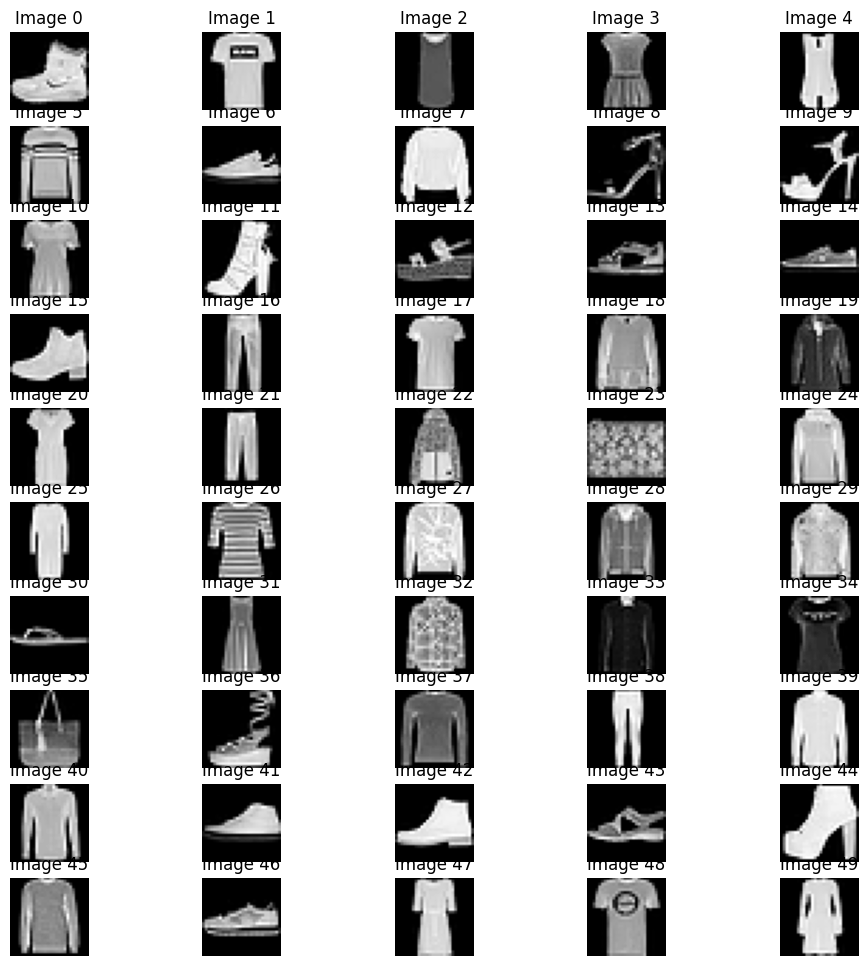

In [18]:
num_images_to_display = 50

# Grid 
num_rows = 10
num_cols = 5

plt.figure(figsize=(12, 12))  

for i in range(num_images_to_display):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Image {i}")
    plt.axis('off')

plt.show()


In [20]:
# Iterating through each image in the dataset
for i in range(len(x_train)):
    img = x_train[i]


    # Embedding the message into the image
    img = np.asarray(Image.fromarray(img))
    print("done")
    message_bits = ''.join([format(i, '08b') for i in message])
    img = img.flatten()
    for idx, bit in enumerate(message_bits):
        val = img[idx]
        val = bin(val)
        val = val[:-1] + bit
        img[idx] = int(val, 2)
    img = img.reshape((28, 28))
    img = Image.fromarray(img)
    
    # Saving the modified image
    img.save(os.path.join(output_dir, f'image_{i}.png'))

done


ValueError: Unknown format code 'b' for object of type 'str'

In [ ]:
# Print a message when done
print(f"Embedded messages in {len(x_train)} images and saved them in {output_dir}.")